In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('final.csv',usecols=lambda x: x != 'Unnamed: 0')
df.head()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,...,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Internet Type_None,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check
0,0,1,0.00,8,39.65,39.65,0.0,20,0.00,59.65,...,0,1,0,0,1,0,0,1,0,0
1,5,72,42.55,18,72.10,5016.65,0.0,0,3063.60,8080.25,...,0,1,0,0,0,0,1,0,1,0
2,0,1,7.11,26,75.55,75.55,0.0,0,7.11,82.66,...,0,0,1,0,1,0,0,1,0,0
3,4,66,0.00,25,56.75,3708.40,0.0,0,0.00,3708.40,...,1,0,0,0,0,0,1,0,1,0
4,0,7,36.49,42,94.05,633.45,0.0,0,255.43,888.88,...,0,0,1,0,0,1,0,0,1,0


# Baseline Prediction 
- Default hyperparameters for models
- No additional modificiation to the dataset


In [71]:
#Setting Dependent and Independent variables
X = df.drop("Churn Label", axis=1)
y = df["Churn Label"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
def pipeline(X_train, X_test, y_train, y_test, rf_params={}, xg_params={}, lr_params={}):
    """
    Args:
        Train and Test data: Pandas dataframe or series
        params: hyperparameter in dictionary format
    Returns:
        Evaluation metrics (CLassification Report)
        Feature importance plot (for tree-based models)
    """

    #Random Forest classifier
    rf = RandomForestClassifier(**rf_params)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    #XGBoost Classifer
    xgb_model = xgb.XGBClassifier(**xg_params)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)

    #Logistic Regression
    lr = LogisticRegression(**lr_params)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    # Generate classification report for Random Forest
    print("Random Forest Classification Report:")
    print(classification_report(y_test, y_pred_rf))

    # Generate classification report for XGBoost
    print("XGBoost Classification Report:")
    print(classification_report(y_test, y_pred_xgb))

    # Generate classification report for XGBoost
    print("Logistic Regression Classification Report:")
    print(classification_report(y_test, y_pred_lr))

    # Get feature importances from Random Forest
    importances_rf = rf.feature_importances_

    # Get feature importances from XGBoost
    importances_xgb = xgb_model.feature_importances_

    # Get feature names
    feature_names = X.columns

    # Sort indices based on feature importances
    indices_rf = np.argsort(importances_rf)[::-1]
    indices_xgb = np.argsort(importances_xgb)[::-1]

    # Plot Random Forest feature importances
    plt.figure(figsize=(10, 6))
    plt.title("Random Forest Feature Importance")
    plt.bar(range(len(indices_rf)), importances_rf[indices_rf])
    plt.xticks(range(len(indices_rf)), feature_names[indices_rf], rotation=90)
    plt.tight_layout()
    plt.show()

    # Plot XGBoost feature importances
    plt.figure(figsize=(10, 6))
    plt.title("XGBoost Feature Importance")
    plt.bar(range(len(indices_xgb)), importances_xgb[indices_xgb])
    plt.xticks(range(len(indices_xgb)), feature_names[indices_xgb], rotation=90)
    plt.tight_layout()
    plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1032
           1       0.74      0.64      0.69       377

    accuracy                           0.84      1409
   macro avg       0.81      0.78      0.79      1409
weighted avg       0.84      0.84      0.84      1409

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1032
           1       0.70      0.66      0.68       377

    accuracy                           0.83      1409
   macro avg       0.79      0.78      0.78      1409
weighted avg       0.83      0.83      0.83      1409

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1032
           1       0.59      0.45      0.51       377

    accuracy                           0.77      1409
   macro avg     

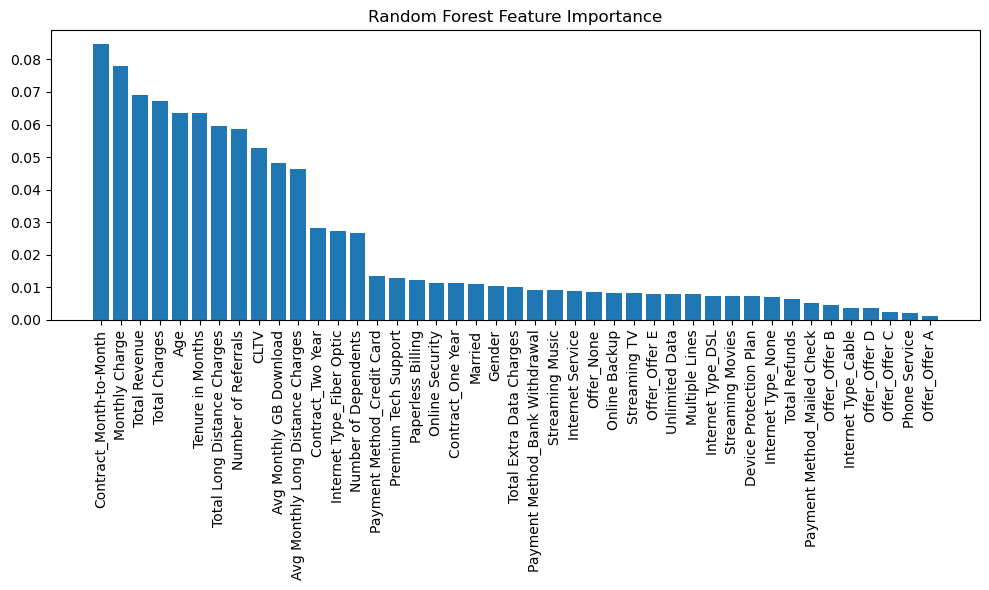

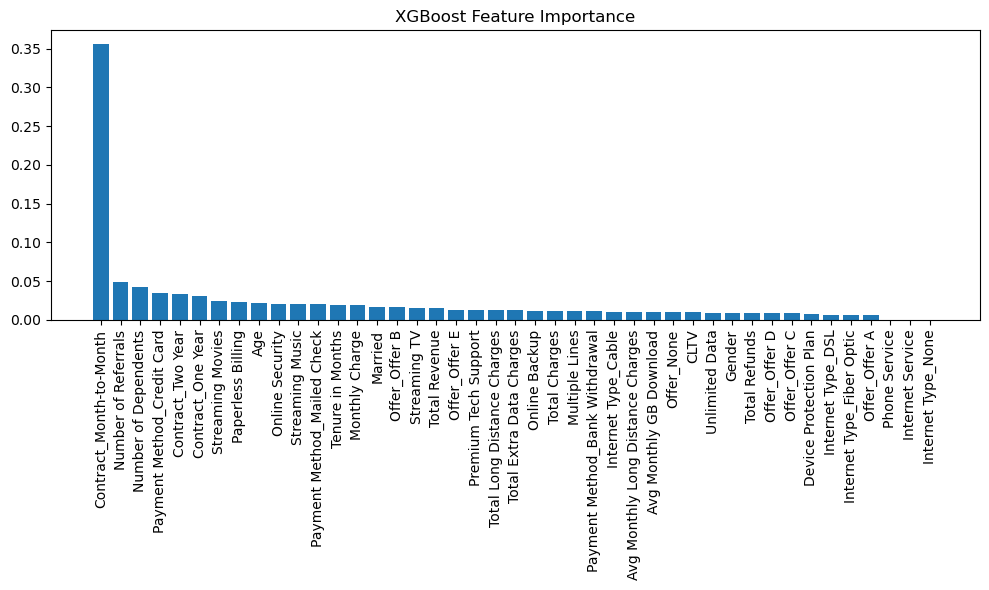

In [52]:
#Baseline Model
pipeline(X_train, X_test, y_train, y_test)

# Modified Parameters (Imbalance Control)
- Random Forest, XGBoost and Logistic regression provides additional hyperparameter that enables controling of imbalance dataset.
- Also increasing the number of estimators (for tree-based) and max_iter (for Logistic regression) provides better training (but prone to overfit)


In [55]:
# Count the occurrences of each class
counts = np.bincount(y_train)
# Estimate the scale_pos_weight value as ratio of negative to positive
scale_pos_weight = float(counts[0]) / float(counts[1])

In [53]:
#Setting hyperparameters for models
rf_param = {'n_estimators': 1000, 'class_weight': 'balanced'}
xgb_param = {'scale_pos_weight': scale_pos_weight, 'n_estimators':1000}
lr_param = {'max_iter':1000, 'class_weight': 'balanced'}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1032
           1       0.75      0.62      0.68       377

    accuracy                           0.84      1409
   macro avg       0.81      0.77      0.79      1409
weighted avg       0.84      0.84      0.84      1409

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1032
           1       0.67      0.71      0.69       377

    accuracy                           0.83      1409
   macro avg       0.78      0.79      0.78      1409
weighted avg       0.83      0.83      0.83      1409

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      1032
           1       0.53      0.87      0.66       377

    accuracy                           0.76      1409
   macro avg     

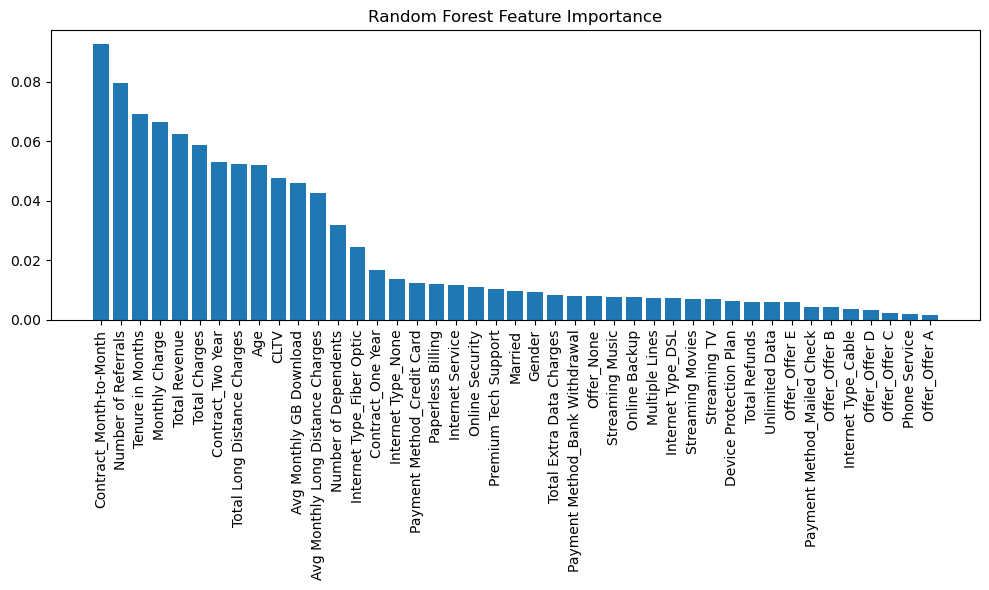

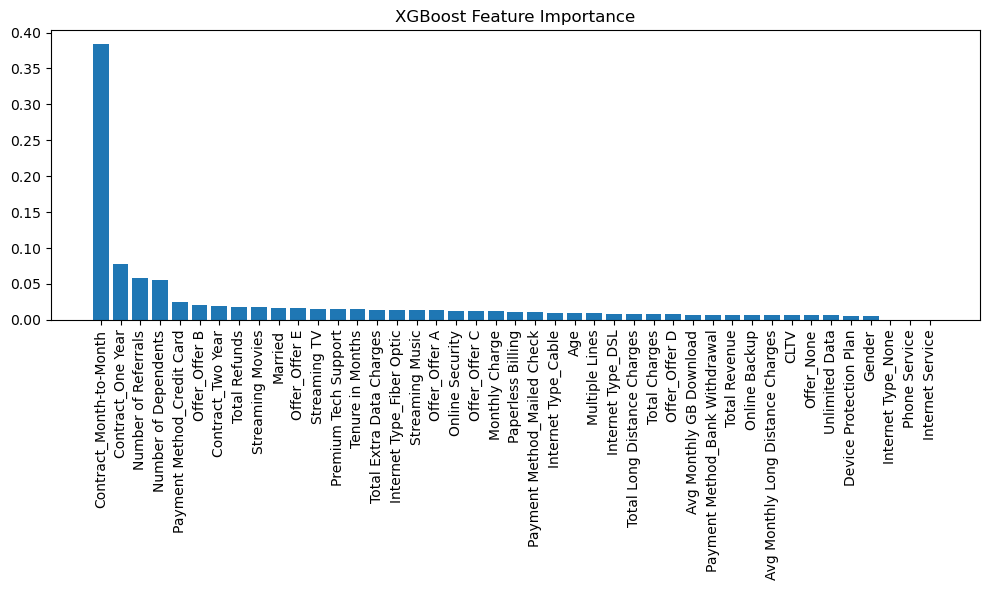

In [54]:
#Running Models with modified parameters
pipeline(X_train, X_test, y_train, y_test, rf_param, xgb_param, lr_param)

# Outlier Removal (Anomaly Detection Approach)

- Because we have seen that the distributions of continuous data were skewed, it can be thought that there are outliers.
- Theory is that removing outliers will reduce the noise to our data and therefore lead to higher performnace of the classifiers.

Two models will be used (Anomaly Detection Algorithms)
- Isolation Forest 
- Local Outlier Factors

In [66]:
# Filter the dataset for non-churn customers
churn_data = df.copy()
churn_data.drop(columns='Churn Label', inplace=True)

# Define and fit the model
isolation_forest = IsolationForest(n_estimators = 1000 ,contamination=0.01)  # adjust contamination parameter
isolation_forest.fit(churn_data)

churn_data['ISO'] = isolation_forest.predict(churn_data)

# Find the indices of the outliers
outliers1 = churn_data[churn_data['ISO'] == -1].index

# Define and fit the model
lof = LocalOutlierFactor(n_neighbors=30, contamination=0.01)  # adjust parameters based on your knowledge about the dataset

# Use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict, decision_function and score_samples methods).
churn_data['LOF'] = lof.fit_predict(churn_data)

# Find the indices of the outliers
outliers2 = churn_data[churn_data['LOF'] == -1].index

outliers = list(set(list(outliers1) + list(outliers2)))
print(f'Total of {len(outliers)} will be removed')

Total of 137 will be removed


#### Visualizing the Outliers 

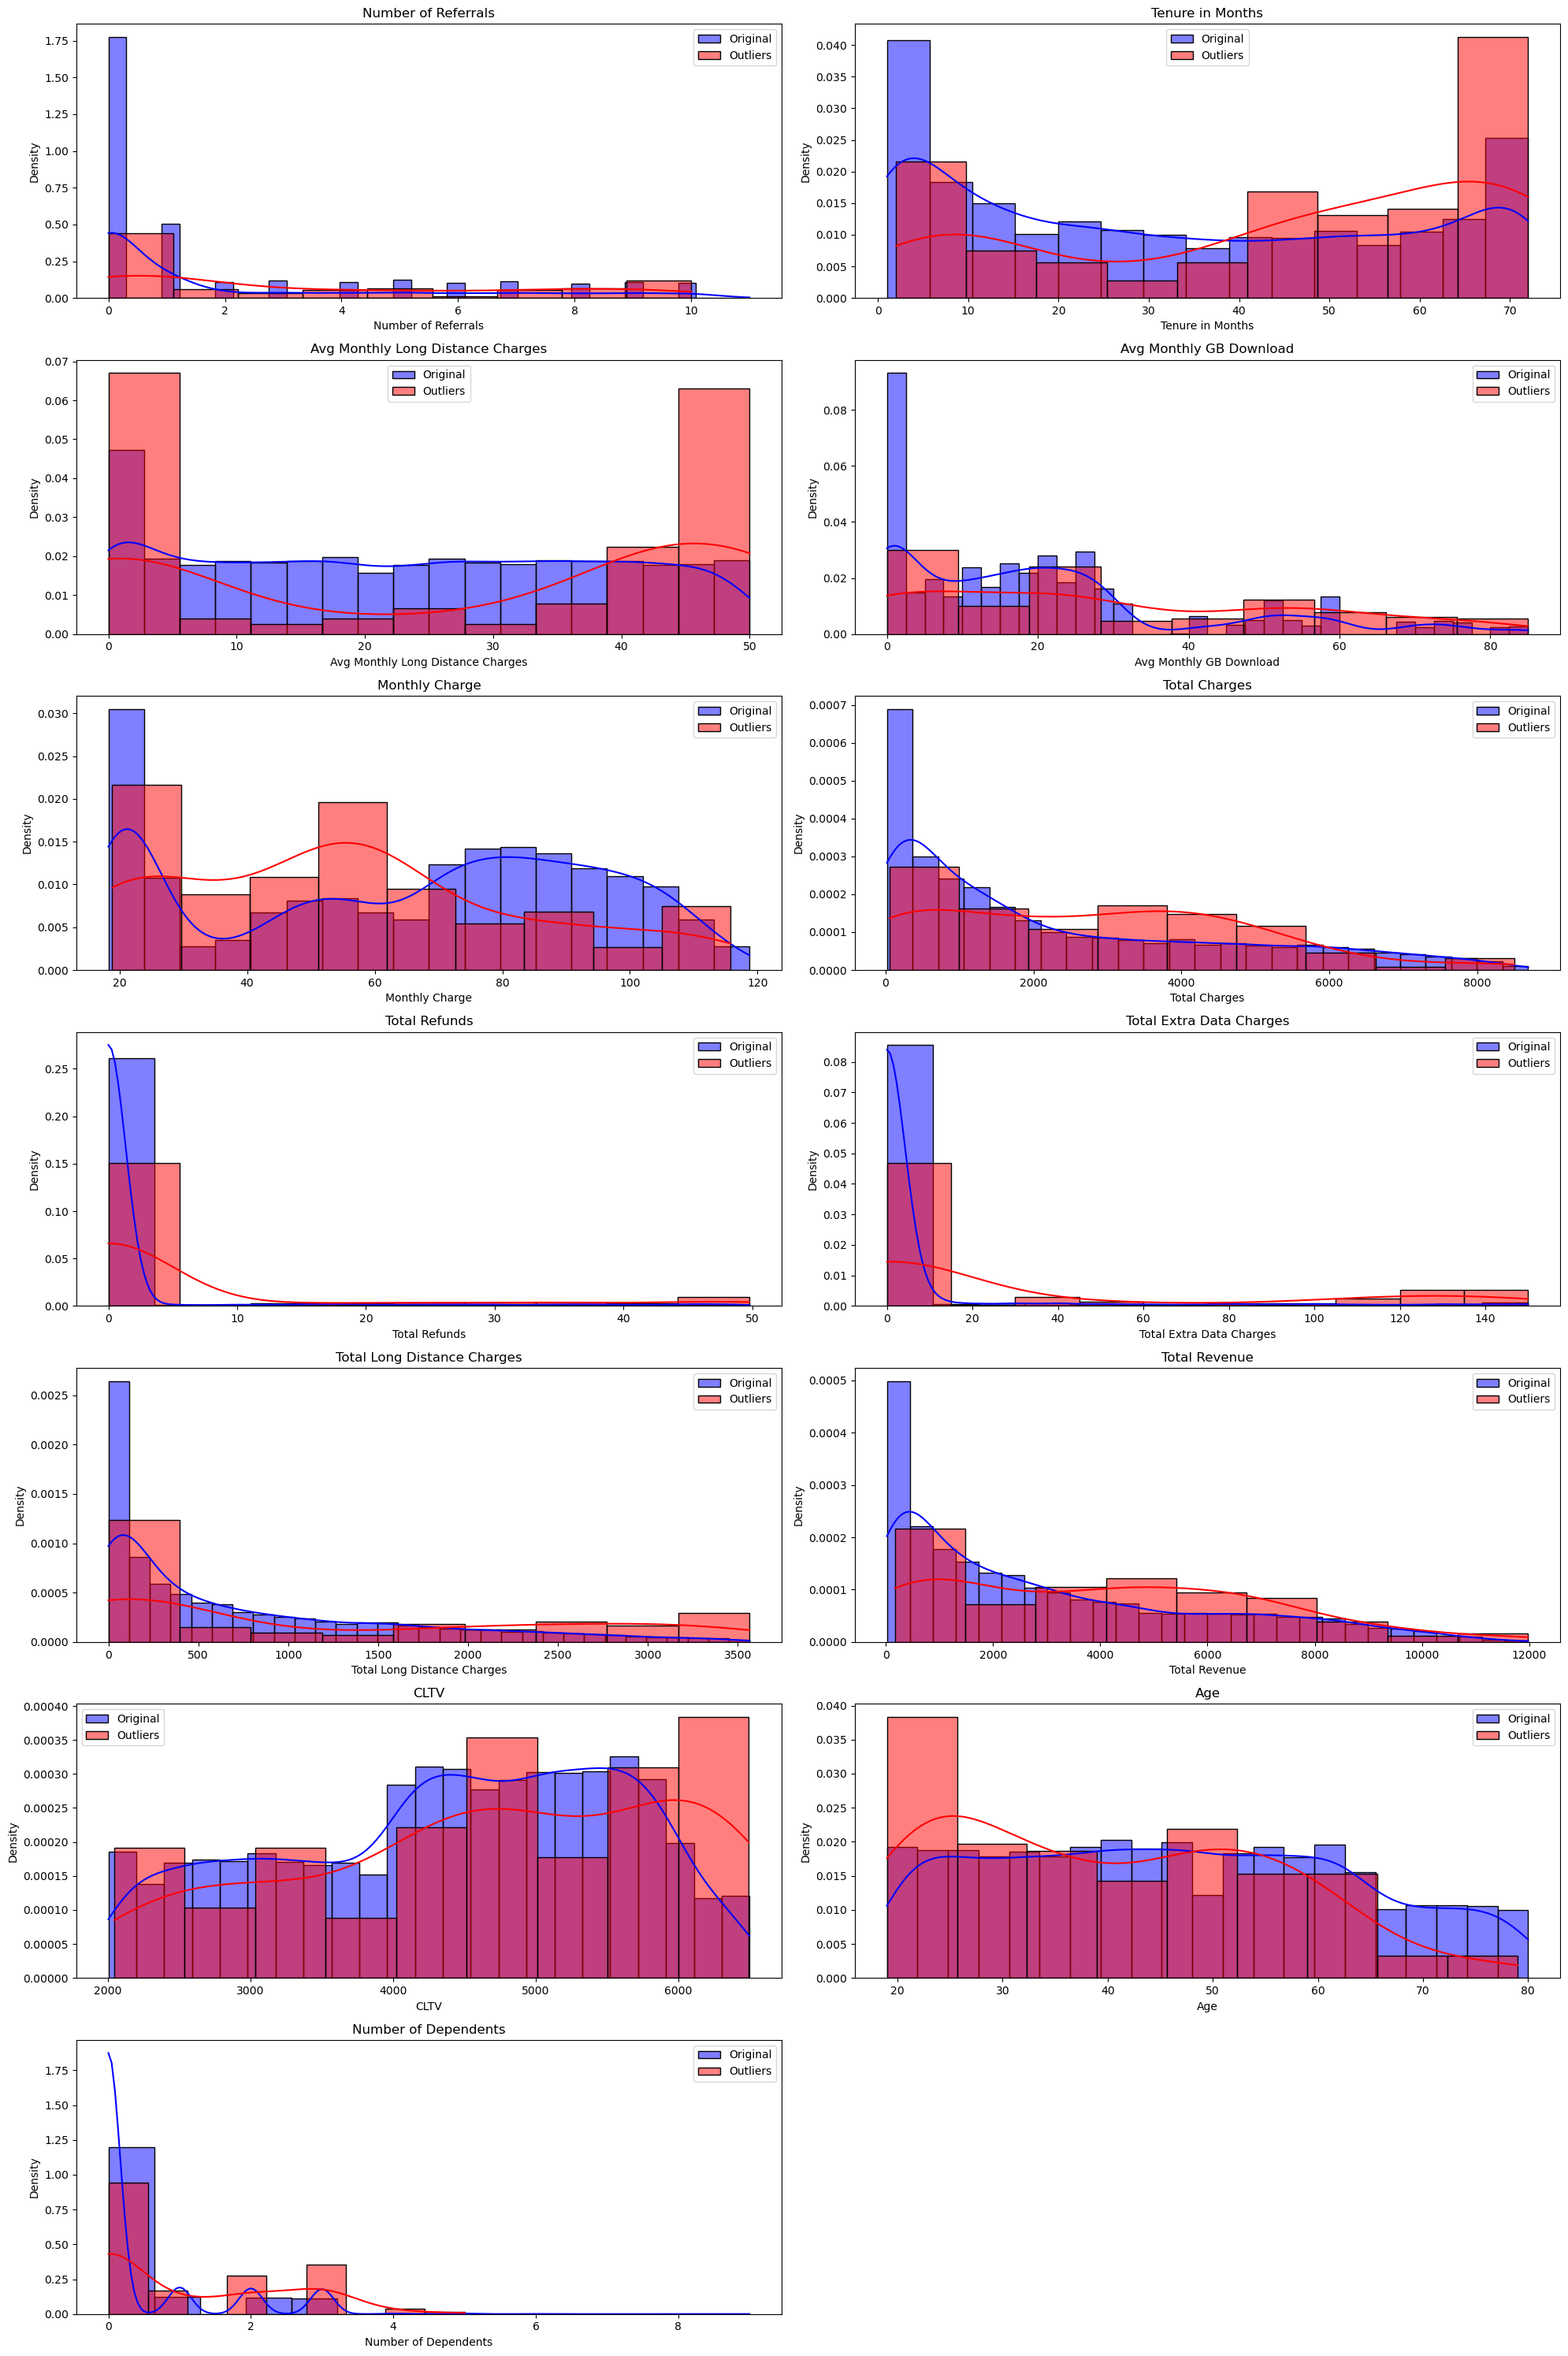

In [92]:
#Selected continuous features
dist_cols = ['Number of Referrals', 'Tenure in Months',
            'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
            'Monthly Charge', 'Total Charges', 'Total Refunds',
            'Total Extra Data Charges', 'Total Long Distance Charges',
            'Total Revenue', 'CLTV', 'Age',
            'Number of Dependents']

nrow = len(dist_cols) // 2 + (len(dist_cols) % 2 > 0)
ncol = 2

fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, 30))

# iterate over the length of dist_cols, not nrow*ncol
for i in range(len(dist_cols)): 
    ax = plt.subplot(nrow, ncol, i+1)
    col_name = dist_cols[i]
    
    # Plot distributions for the original dataframe (df)
    sns.histplot(data = df, x = col_name, ax = ax, color = 'blue', kde=True, stat='density', label='Original')
    
    # Plot distributions for the dataframe with outliers
    sns.histplot(data = df.loc[outliers], x = col_name, ax = ax, color = 'red', kde=True, stat='density', label='Outliers')
    
    ax.set_title(col_name)
    ax.legend()

# Remove the empty subplots
if len(dist_cols) < nrow*ncol:
    for i in range(len(dist_cols), nrow*ncol):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In terms of the distribution shape, most of the features show different shapes (Original vs Outliers)

In [69]:
#Removing Outliers from the original data
out_df = churn_data.drop(outliers)
out_df['Churn Label'] = df.drop(outliers)['Churn Label']
out_df.drop(columns = ['ISO','LOF'], inplace = True)

#Setting Dependent and Independent variables
X_out = out_df.drop("Churn Label", axis=1)
y_out = out_df["Churn Label"]

XO_train, XO_test, yO_train, yO_test = train_test_split(X_out, y_out, test_size=0.2, random_state=42)

### Default Parameter + Outlier Removal

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1008
           1       0.79      0.65      0.71       373

    accuracy                           0.86      1381
   macro avg       0.83      0.79      0.81      1381
weighted avg       0.85      0.86      0.85      1381

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1008
           1       0.76      0.68      0.72       373

    accuracy                           0.85      1381
   macro avg       0.82      0.80      0.81      1381
weighted avg       0.85      0.85      0.85      1381

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1008
           1       0.67      0.49      0.56       373

    accuracy                           0.80      1381
   macro avg     

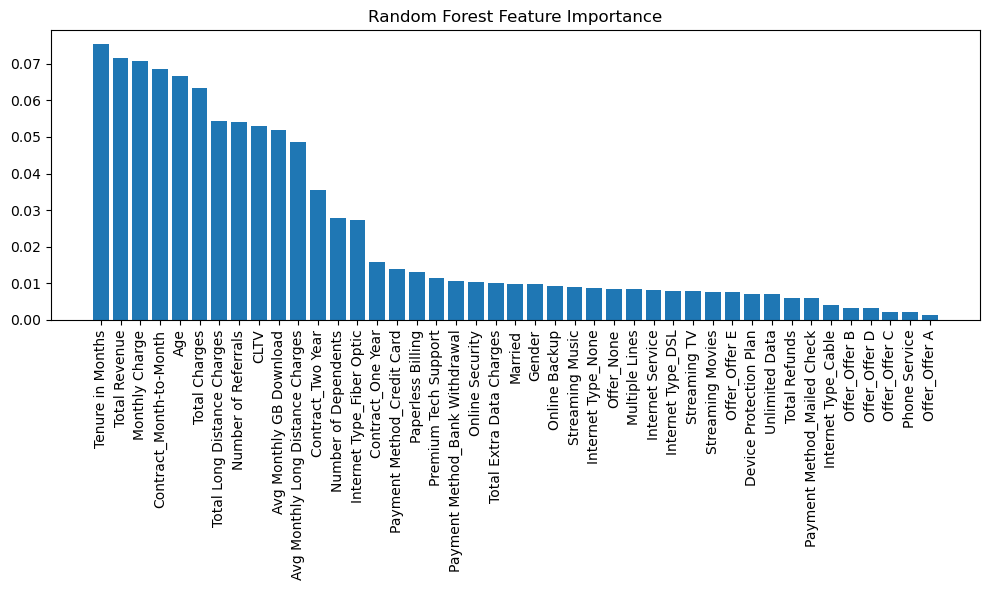

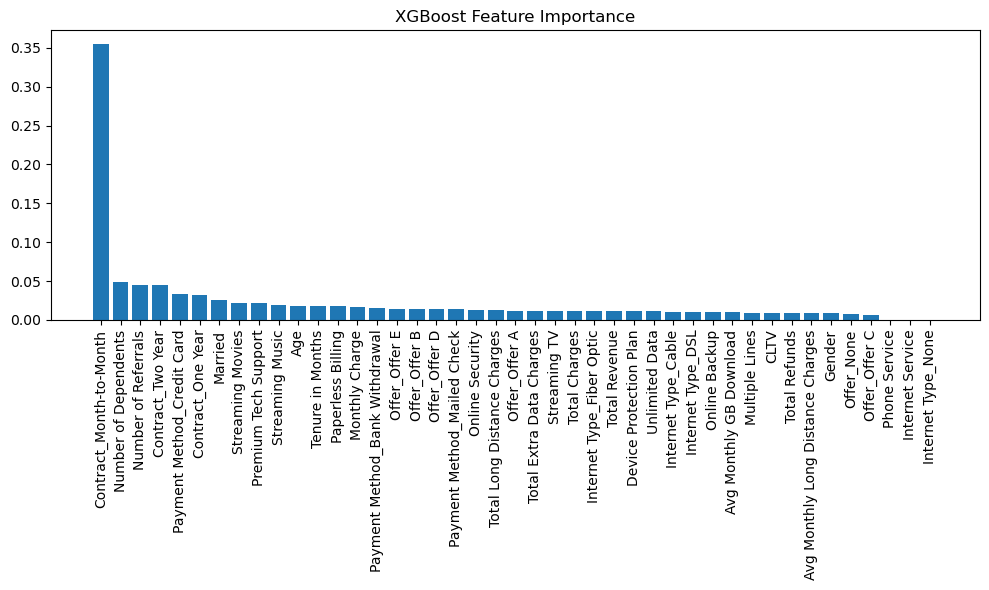

In [63]:
#Run models on Outlier removed dataset + Default parameter
pipeline(XO_train, XO_test, yO_train, yO_test)

Result compare to Original Dataset + Default parameter
- Overall Precision score increase after removal of outliers
- Overall increase in Recall score after removal of outliers

### Modified parameter + Outlier Removal


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1008
           1       0.78      0.64      0.70       373

    accuracy                           0.85      1381
   macro avg       0.83      0.79      0.80      1381
weighted avg       0.85      0.85      0.85      1381

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1008
           1       0.72      0.70      0.71       373

    accuracy                           0.84      1381
   macro avg       0.80      0.80      0.80      1381
weighted avg       0.84      0.84      0.84      1381

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1008
           1       0.55      0.86      0.67       373

    accuracy                           0.77      1381
   macro avg     

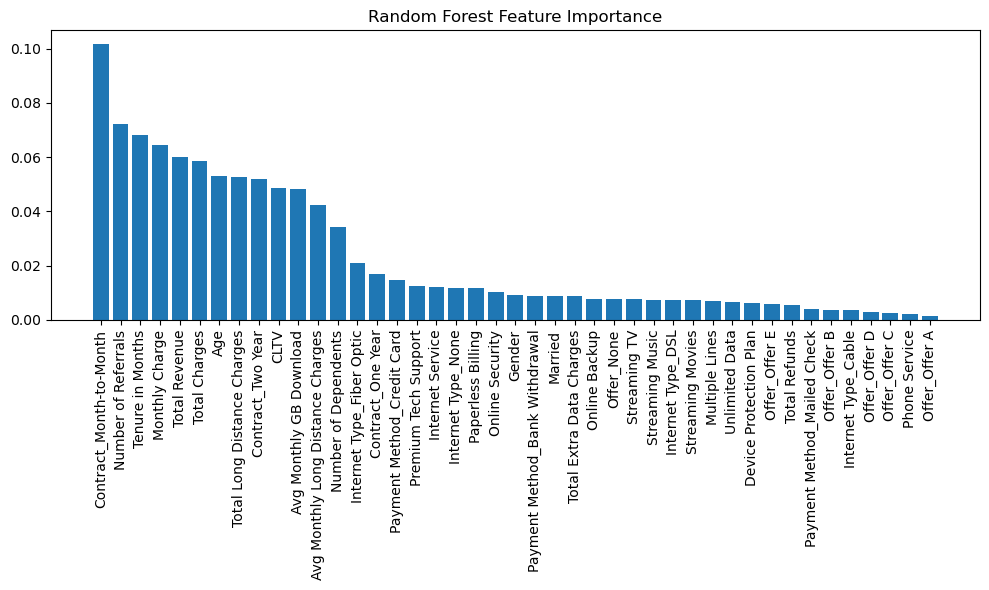

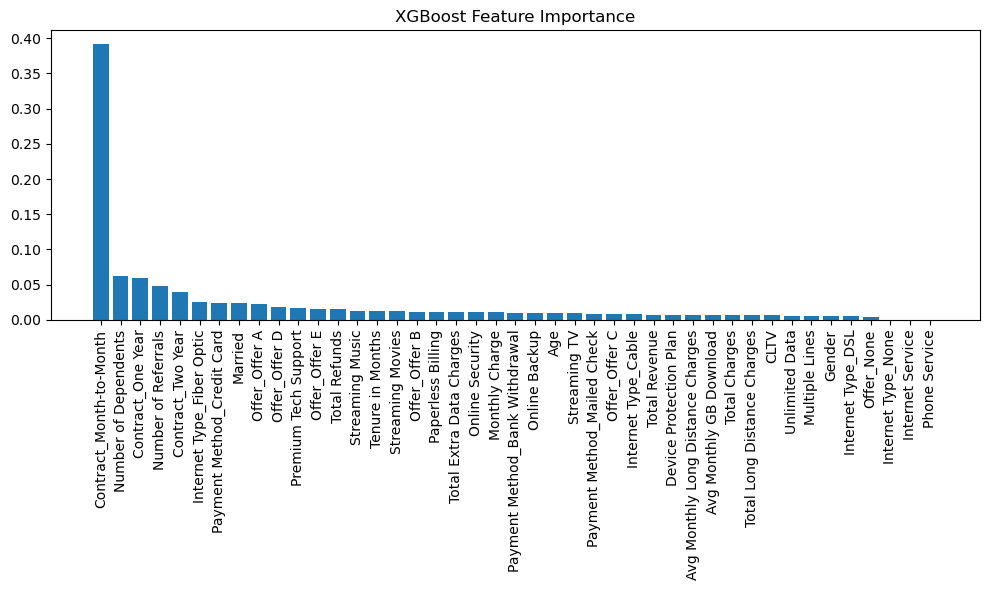

In [65]:
#Run models on modified parameters + Outliers removed dataset
pipeline(XO_train, XO_test, yO_train, yO_test, rf_param, xgb_param, lr_param)

Result compared to Original dataset + Modified parameters (Imbalance Control)
- Increase in Precision and Recall with outlier removal 

# Stacking Approach

- Based on the ensemble theory, taking multiple models and combining them will provide better result.
- We have seen that Logistic Regression showed low precision but high recall (Less False Positive cases), this may be beneficial if we were to combine different models

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Create a pipeline for logistic regression that includes scaling
lr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Initialize the classifiers
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

xgb_model = xgb.XGBClassifier(scale_pos_weight = scale_pos_weight, n_estimators = 1000)

# Initialize the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr_pipeline), ('rf', rf), ('xgb', xgb_model)],
    voting='soft') # you can also use 'hard' voting

# Perform 5-fold cross-validation
precision = cross_val_score(voting_clf, X_out, y_out, cv=5, scoring='precision')
recall = cross_val_score(voting_clf, X_out, y_out, cv=5, scoring='recall')

print("Recall scores:", precision)
print("Average Precision score: ", precision.mean())

print("Precision scores:", recall)
print("Average Recall score: ", recall.mean())


Recall scores: [0.68019093 0.74677003 0.68489583 0.66761364 0.66767372]
Average Precision score:  0.6894288284672874
Precision scores: [0.7688172  0.78225806 0.70698925 0.63342318 0.59568733]
Average Recall score:  0.6974350056516824


To measure the true score, cross validation of 5 folds was performed.
<br>
We have seen that XGBoost was the best performing model for all differenc combinations
<br>
It would be necessary to compare cross validation score of XGBoost to see whether the stacking improved the score

In [75]:
#XGBoost with Outlier removed dataset
precision = cross_val_score(xgb_model, X_out, y_out, cv=5, scoring='precision')
recall = cross_val_score(xgb_model, X_out, y_out, cv=5, scoring='recall')

print("Recall scores:", precision)
print("Average Precision score: ", precision.mean())

print("Precision scores:", recall)
print("Average Recall score: ", recall.mean())

Recall scores: [0.6825     0.73280423 0.66208791 0.65957447 0.66876972]
Average Recall score:  0.6811472658131158
Precision scores: [0.73387097 0.74462366 0.64784946 0.58490566 0.57142857]
Average Precision score:  0.6565356635654871


In [76]:
#XGBoost with Original dataset
xgb_model = xgb.XGBClassifier(scale_pos_weight = scale_pos_weight, n_estimators = 1000)

precision = cross_val_score(xgb_model, X, y, cv=5, scoring='precision')
recall = cross_val_score(xgb_model, X, y, cv=5, scoring='recall')

print("Recall scores:", precision)
print("Average Precision score: ", precision.mean())

print("Precision scores:", recall)
print("Average Recall score: ", recall.mean())

Recall scores: [0.66748768 0.74386921 0.66570605 0.6568915  0.66975309]
Average Recall score:  0.6807415056864906
Precision scores: [0.72459893 0.72994652 0.61764706 0.59893048 0.58176944]
Average Precision score:  0.6505784863299451


### Conclusion
- ~1% increase in precision score when Stacking was done
- ~5% increase in recall score when Stacking was done
<br>

Increase in the recall score means there are more true positive cases observed (Model able to capture customers who are actually going to churn)
<br>
Increase in precision score means there are less false positives (Model able to reduce instances where falsely infering customers that are not actually going to churn)

### Business Solution

- Average churn rate in telecom industry is about 22% (Based on Google search)
- Let's assume that the average charge is ~$60 (Based on the dataset mean value of Monthly Charge)
- In USA, there are total of 449million customers using wireless services

In [102]:
print(f'There is about ${60 * 113600000} used every month in T-Mobile') 
print(f'5% Increase in capturing the churn would result in savings of ${113600000 * 0.05 * 60} per month')
print(f'Reducing the false positive rate would reduce the cost of utilizing labor to reach out to those customers and perform additional work but there is not harm in terms of monetization')

There is about $6816000000 used every month in T-Mobile
5% Increase in capturing the churn would result in savings of $340800000.0 per month
Reducing the false positive rate would reduce the cost of utilizing labor to reach out to those customers and perform additional work but there is not harm in terms of monetization


## Feature Selected Model

In [105]:
#These features were selected based on the Feature importance of Models + Statistical Analysis (Cramer-v and Distribution Dissimilarity measure scores)
feature_selected = ['Total Long Distance Charges',
 'Total Revenue',
 'Contract_Two Year',
 'Payment Method_Credit Card',
 'Internet Service',
 'Contract_Month-to-Month',
 'Internet Type_None',
 'Total Charges',
 'Internet Type_Fiber Optic',
 'Contract_One Year',
 'Tenure in Months',
 'Monthly Charge',
 'Number of Dependents',
 'Offer_Offer E',
 'Number of Referrals']

In [107]:
#Setting Dependent and Independent variables
X_sel = df.drop("Churn Label", axis=1)
y_sel = df["Churn Label"]

# Split into train and test sets
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_sel[feature_selected], y_sel, test_size=0.2, random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1032
           1       0.71      0.62      0.66       377

    accuracy                           0.83      1409
   macro avg       0.79      0.76      0.77      1409
weighted avg       0.83      0.83      0.83      1409

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1032
           1       0.65      0.65      0.65       377

    accuracy                           0.81      1409
   macro avg       0.76      0.76      0.76      1409
weighted avg       0.81      0.81      0.81      1409

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1032
           1       0.56      0.84      0.67       377

    accuracy                           0.78      1409
   macro avg     

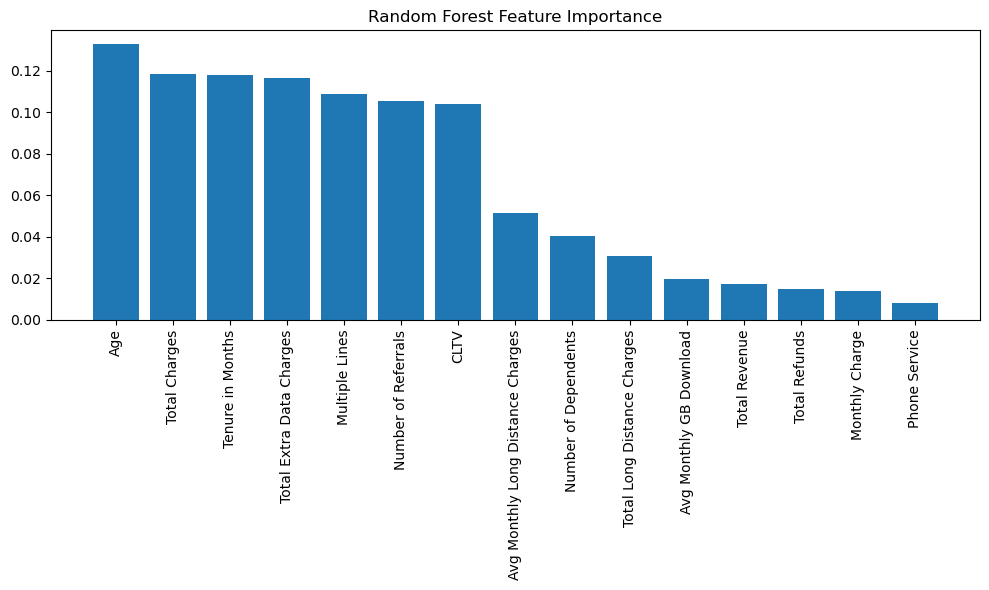

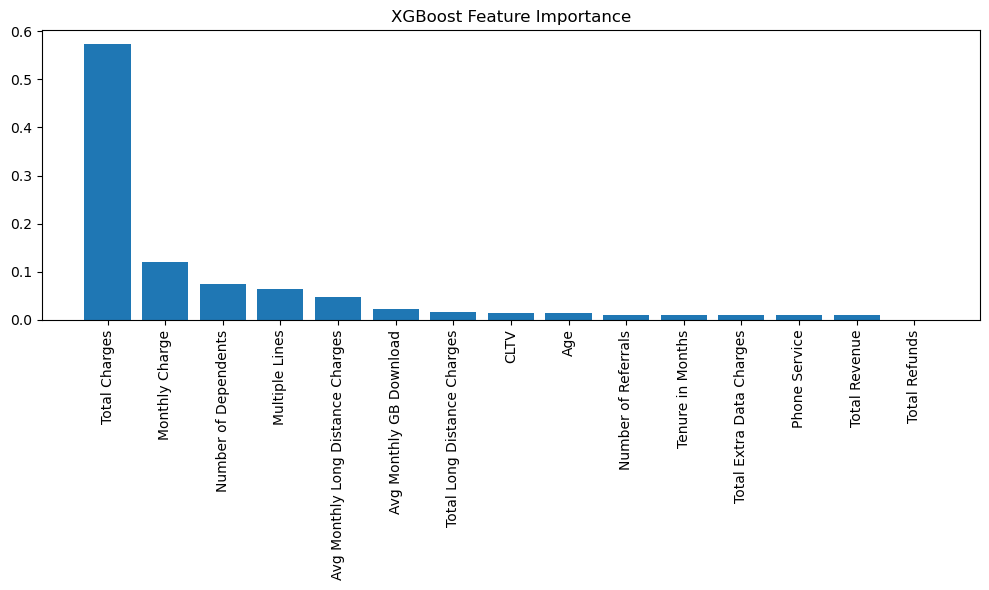

In [109]:
pipeline(Xs_train, Xs_test, ys_train, ys_test, rf_param, xgb_param, lr_param)

Conclusion
- Overall score were reduced when compared to full feature dataset. (This could potentially because different feautures add more value when deciding churn)
- Different plot importance score resulted from tree-based models (Total Charges being most prominent)

It would require additional analysis whether removed feature results in more generalized model